In [2]:
import sqlite3

# Create database and connect
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Sample data
data = [
    ("Product A", 10, 15.0),
    ("Product B", 5, 25.0),
    ("Product A", 7, 15.0),
    ("Product C", 3, 30.0),
    ("Product B", 4, 25.0)
]

# Insert data
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)

# Commit and close
conn.commit()
conn.close()


In [3]:
import sqlite3
import pandas as pd

# Reconnect to database
conn = sqlite3.connect("sales_data.db")

# SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()


In [4]:
#To Display output

print(df)

     product  total_qty  revenue
0  Product A         34    510.0
1  Product B         18    450.0
2  Product C          6    180.0


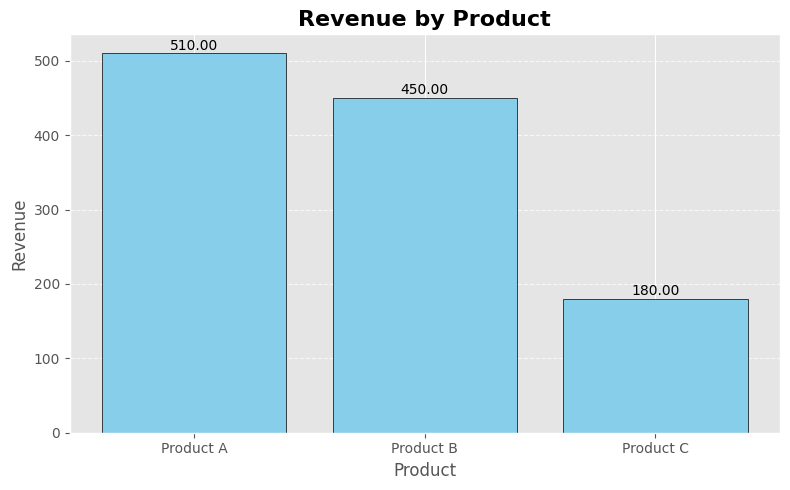

In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(df['product'], df['revenue'], color='skyblue', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
ax.set_title("Revenue by Product", fontsize=16, fontweight='bold')
ax.set_xlabel("Product", fontsize=12)
ax.set_ylabel("Revenue", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Optional: Save the chart
plt.savefig("sales_chart_pretty.png")
plt.show()
